# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

# 2. Read Data

In [2]:
data = pd.read_csv('../image_to_csv/skin_cancer_dataset.csv')

data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287,label
0,198.0,159.0,160.0,201.0,162.0,163.0,209.0,170.0,171.0,211.0,...,179.0,143.0,140.0,173.0,134.0,131.0,162.0,122.0,117.0,benign
1,121.0,115.0,117.0,134.0,128.0,130.0,136.0,131.0,133.0,145.0,...,51.0,59.0,69.0,73.0,83.0,96.0,91.0,104.0,124.0,benign
2,186.0,136.0,125.0,186.0,137.0,121.0,189.0,142.0,118.0,194.0,...,178.0,129.0,114.0,174.0,124.0,115.0,167.0,116.0,110.0,benign
3,178.0,132.0,136.0,180.0,140.0,137.0,185.0,140.0,131.0,180.0,...,130.0,92.0,82.0,139.0,100.0,93.0,130.0,94.0,89.0,benign
4,193.0,156.0,167.0,195.0,155.0,166.0,199.0,156.0,168.0,204.0,...,203.0,164.0,175.0,198.0,160.0,171.0,194.0,156.0,167.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malignant
9601,171.0,164.0,171.0,174.0,167.0,174.0,178.0,171.0,178.0,178.0,...,183.0,170.0,183.0,184.0,172.0,185.0,183.0,170.0,180.0,malignant
9602,148.0,131.0,124.0,149.0,131.0,123.0,146.0,125.0,114.0,153.0,...,103.0,74.0,75.0,92.0,62.0,61.0,86.0,57.0,54.0,malignant
9603,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,malignant


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9605 entries, 0 to 9604
Columns: 12289 entries, pixel_0 to label
dtypes: float64(12288), object(1)
memory usage: 900.5+ MB


### 3.1.2. Remove Missing Values

In [4]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_12278,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287
count,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,...,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000,9605.000000
mean,123.532119,96.419573,95.827798,129.822905,101.427277,100.359500,136.028631,106.653722,105.480791,141.603852,...,110.364602,134.341176,107.904112,105.787194,127.890578,102.444768,100.468506,121.229672,96.689016,95.047059
std,74.523118,61.973802,64.340661,74.478103,62.038440,64.453561,73.720315,61.734800,64.202675,72.793793,...,63.355411,70.623788,61.697098,63.759845,70.941112,61.880987,63.833935,71.138207,61.956268,63.804412
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,37.000000,36.000000,67.000000,48.000000,44.000000,87.000000,63.000000,54.000000,105.000000,...,70.000000,99.000000,69.000000,62.000000,83.000000,59.000000,52.000000,63.000000,45.000000,41.000000
50%,148.000000,109.000000,104.000000,156.000000,115.000000,110.000000,162.000000,121.000000,116.000000,167.000000,...,119.000000,157.000000,120.000000,113.000000,149.000000,114.000000,105.000000,140.000000,106.000000,97.000000
75%,184.000000,142.000000,146.000000,189.000000,147.000000,150.000000,193.000000,151.000000,154.000000,196.000000,...,159.000000,187.000000,153.000000,155.000000,182.000000,149.000000,150.000000,177.000000,143.000000,146.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'label'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [11]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [12]:
clf = MLPClassifier(
    hidden_layer_sizes=(50, 10, 10),
    activation='relu',
    learning_rate_init=0.002,
    max_iter=1000,
    batch_size=X_train_scaled.shape[0],
    alpha=0,
    solver='sgd',
    momentum=0
)

## 6.2. Train Model

In [13]:
clf.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0, batch_size=7684, hidden_layer_sizes=(50, 10, 10),
              learning_rate_init=0.002, max_iter=1000, momentum=0,
              solver='sgd')

## 6.3. Loss Curve

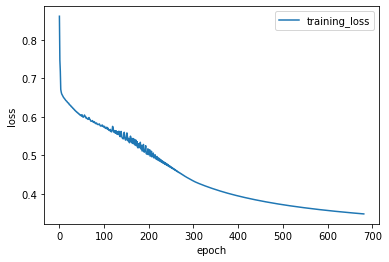

In [14]:
plt.plot(clf.loss_curve_, label='training_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## 6.4. Model's Weight & Bias

In [15]:
for coef_ in clf.coefs_:
    print(coef_.shape)

(12288, 50)
(50, 10)
(10, 10)
(10, 1)


In [16]:
for intercept_ in clf.intercepts_:
    print(intercept_.shape)

(50,)
(10,)
(10,)
(1,)


# 7. Prediction

## 7.1. Training Set

In [17]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [18]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

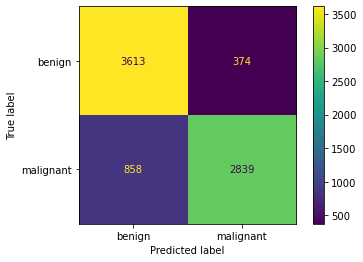

In [19]:
plot_confusion_matrix(clf, X_train_scaled, y_train)

### 8.1.2. Scoring

In [20]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [21]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
benign,0.808097,0.906195,0.854339,3987.000000
malignant,0.883598,0.767920,0.821708,3697.000000
accuracy,0.839667,0.839667,0.839667,0.839667
macro avg,0.845847,0.837058,0.838023,7684.000000
weighted avg,0.844423,0.839667,0.838639,7684.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

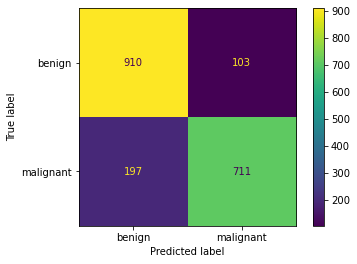

In [22]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

### 8.2.2. Scoring

In [23]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [24]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
benign,0.822042,0.898322,0.858491,1013.000000
malignant,0.873464,0.783040,0.825784,908.000000
accuracy,0.843831,0.843831,0.843831,0.843831
macro avg,0.847753,0.840681,0.842137,1921.000000
weighted avg,0.846348,0.843831,0.843031,1921.000000


# 9. Save Model

In [25]:
import pickle

In [26]:
pickle.dump((clf, scaler), open('skin_cancer_model.pickle', 'wb'))